In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    cohen_kappa_score,
    matthews_corrcoef,
    hamming_loss,
    jaccard_score,
    log_loss,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
)
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# Data Pre-Processing

In [59]:
# Loading dataset
df = pd.read_excel('/Users/sukanya/Documents/Alziemers Multi Modal/Dataset/FINAL.xlsx')

X = df.drop(columns=['ID', 'Dementia_Category'])
y = df['Dementia_Category']

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Helper function for evaluation
def evaluate_model(model, model_name):
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calculate basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1 = report['weighted avg']['f1-score']
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred, average='weighted')
    logloss = log_loss(y_test, model.predict_proba(X_test_scaled))

    # Print metrics
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Cohen's Kappa: {cohen_kappa:.4f}")
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print(f"Hamming Loss: {hamming:.4f}")
    print(f"Weighted Jaccard Score: {jaccard:.4f}")
    print(f"Log Loss: {logloss:.4f}")

    # Classification Report
    report_df = pd.DataFrame(report).transpose()
    print(report_df)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision, Recall, and F1-Score per class
    class_labels = np.unique(y_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, labels=class_labels)
    metrics_df = pd.DataFrame({
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, index=class_labels)

    # Bar plot for Precision, Recall, and F1-Score
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Comparison of Precision, Recall, and F1 Score for {model_name}')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.legend(loc='upper right')
    plt.grid(axis='y')
    plt.ylim(0, 1)
    plt.show()

    # Binarize y_test for ROC and Precision-Recall Curves
    y_test_bin = label_binarize(y_test, classes=class_labels)
    y_score = model.predict_proba(X_test_scaled)

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(class_labels):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC curve for class {label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(class_labels):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        avg_precision = average_precision_score(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, label=f'Precision-Recall curve for class {label} (AP={avg_precision:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()


# Random Forest Classifier + Boosting Algorithms

## AdaBoost

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebre

Stacked AdaBoost + Random Forest Results:
Accuracy: 0.9502
F1 Score: 0.9298
Cohen's Kappa: 0.9192
Matthews Correlation Coefficient: 0.9230
Hamming Loss: 0.0498
Weighted Jaccard Score: 0.9156
Log Loss: 0.1031
              precision    recall  f1-score     support
0              0.696970  1.000000  0.821429   23.000000
1              0.000000  0.000000  0.000000   10.000000
2              1.000000  1.000000  1.000000  102.000000
3              1.000000  1.000000  1.000000   66.000000
accuracy       0.950249  0.950249  0.950249    0.950249
macro avg      0.674242  0.750000  0.705357  201.000000
weighted avg   0.915574  0.950249  0.929815  201.000000


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


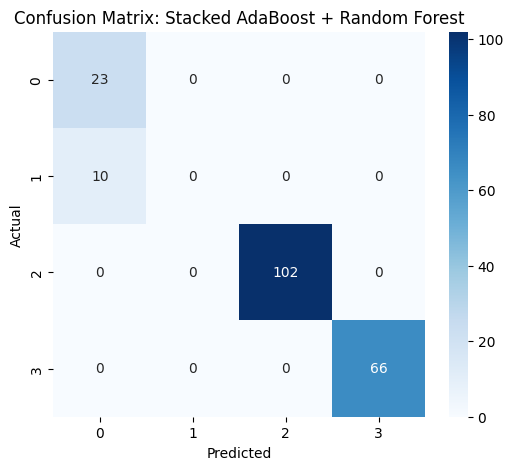

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


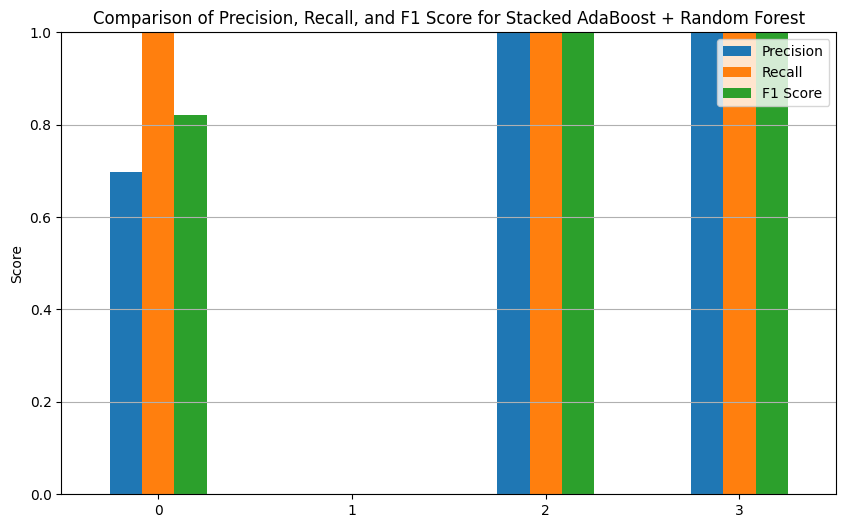

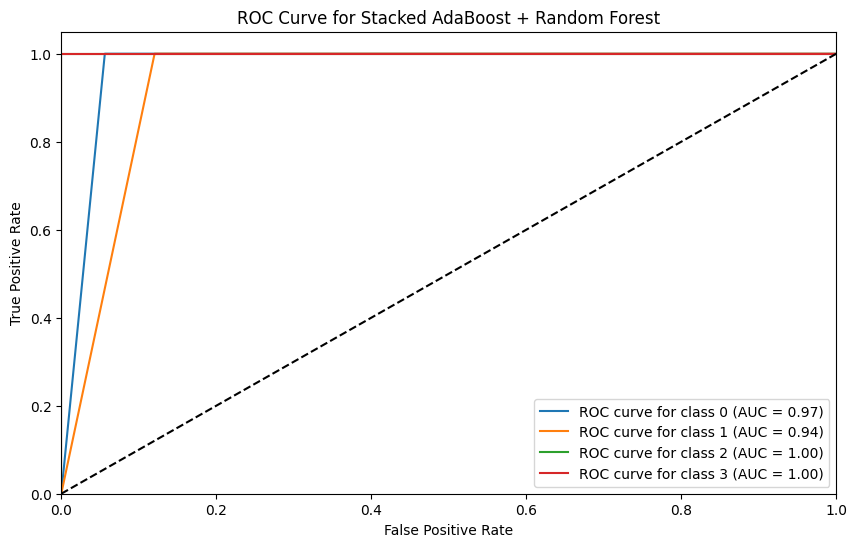

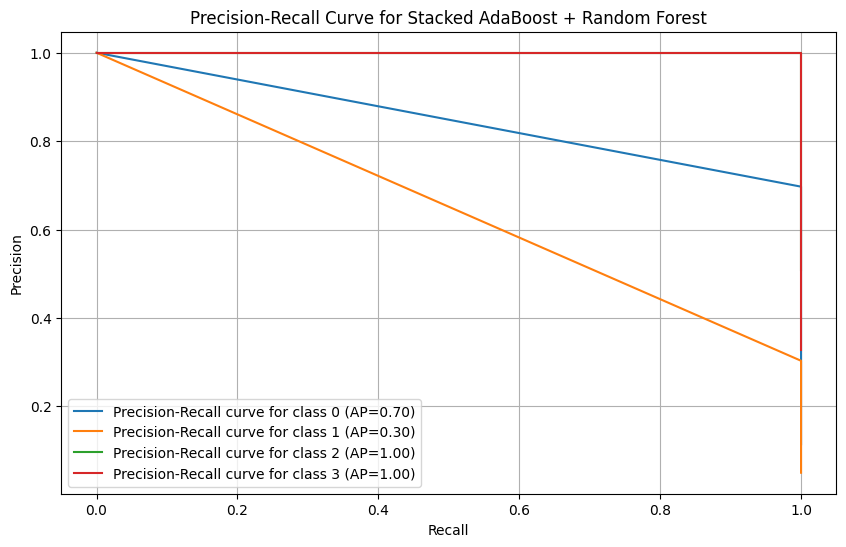

In [35]:
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier

# Stacking AdaBoost and Random Forest
stacked_model = StackingClassifier(estimators=[
    ('ada', AdaBoostClassifier())
], final_estimator=RandomForestClassifier())

evaluate_model(stacked_model, 'Stacked AdaBoost + Random Forest')

## Gradient Boosting

Stacked Gradient Boosting + Random Forest Results:
Accuracy: 0.9851
F1 Score: 0.9851
Cohen's Kappa: 0.9759
Matthews Correlation Coefficient: 0.9760
Hamming Loss: 0.0149
Weighted Jaccard Score: 0.9706
Log Loss: 0.0544
              precision    recall  f1-score     support
0              1.000000  0.956522  0.977778   23.000000
1              1.000000  1.000000  1.000000   10.000000
2              0.990099  0.980392  0.985222  102.000000
3              0.970588  1.000000  0.985075   66.000000
accuracy       0.985075  0.985075  0.985075    0.985075
macro avg      0.990172  0.984228  0.987019  201.000000
weighted avg   0.985318  0.985075  0.985057  201.000000


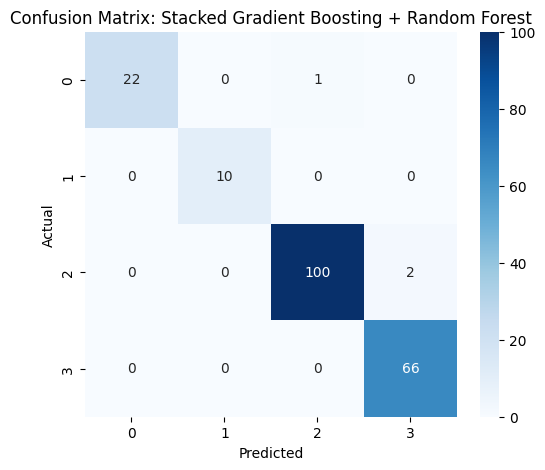

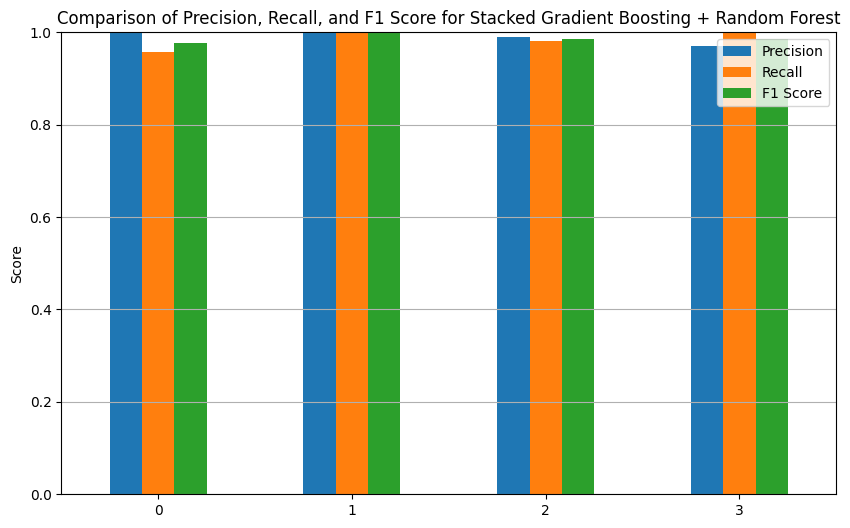

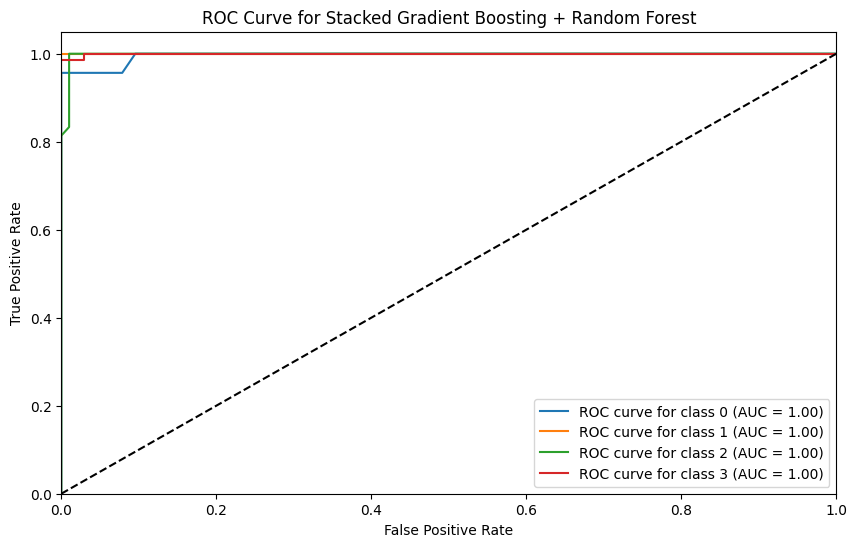

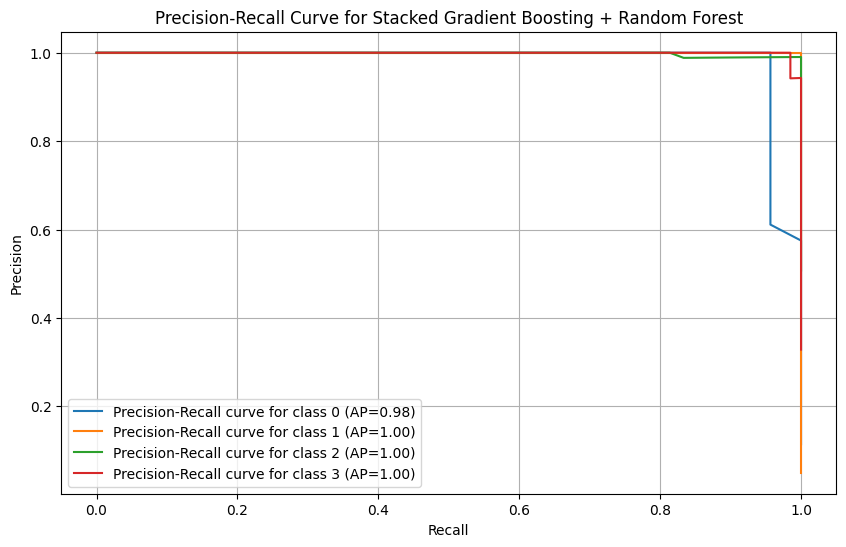

In [58]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

# Stacking Gradient Boosting and Random Forest
stacked_model = StackingClassifier(estimators=[
    ('gb', GradientBoostingClassifier())
], final_estimator=RandomForestClassifier())

evaluate_model(stacked_model, 'Stacked Gradient Boosting + Random Forest')


## XGboost

Random Forest + XGBoost Results:
Accuracy: 0.9950
F1 Score: 0.9951
Cohen's Kappa: 0.9920
Matthews Correlation Coefficient: 0.9920
Hamming Loss: 0.0050
Weighted Jaccard Score: 0.9905
Log Loss: 0.0639
              precision    recall  f1-score     support
0              1.000000  0.956522  0.977778   23.000000
1              0.909091  1.000000  0.952381   10.000000
2              1.000000  1.000000  1.000000  102.000000
3              1.000000  1.000000  1.000000   66.000000
accuracy       0.995025  0.995025  0.995025    0.995025
macro avg      0.977273  0.989130  0.982540  201.000000
weighted avg   0.995477  0.995025  0.995088  201.000000


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


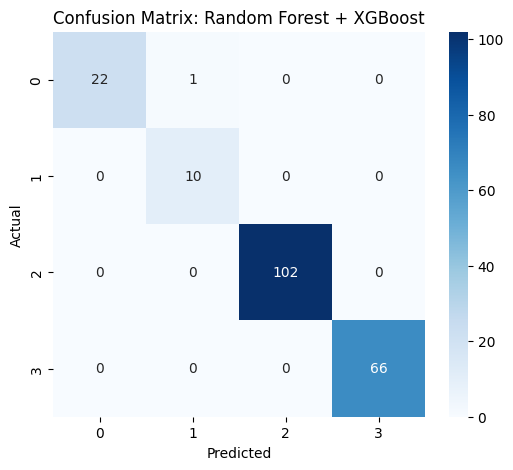

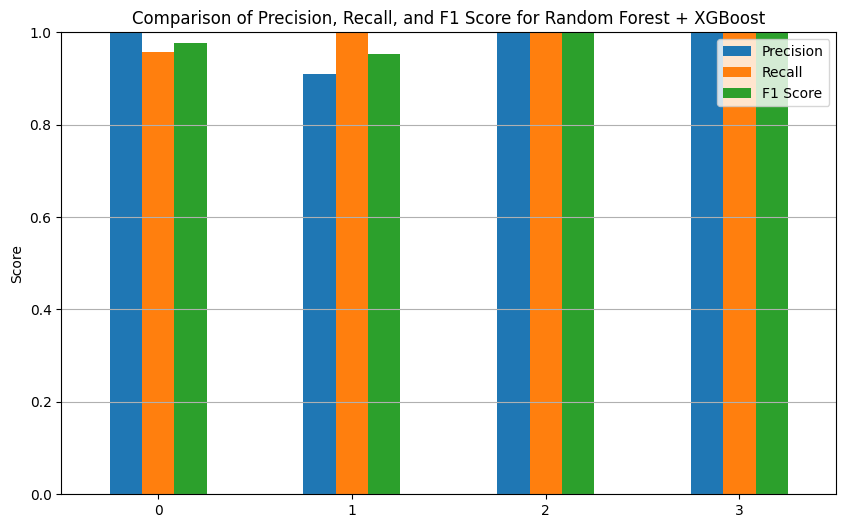

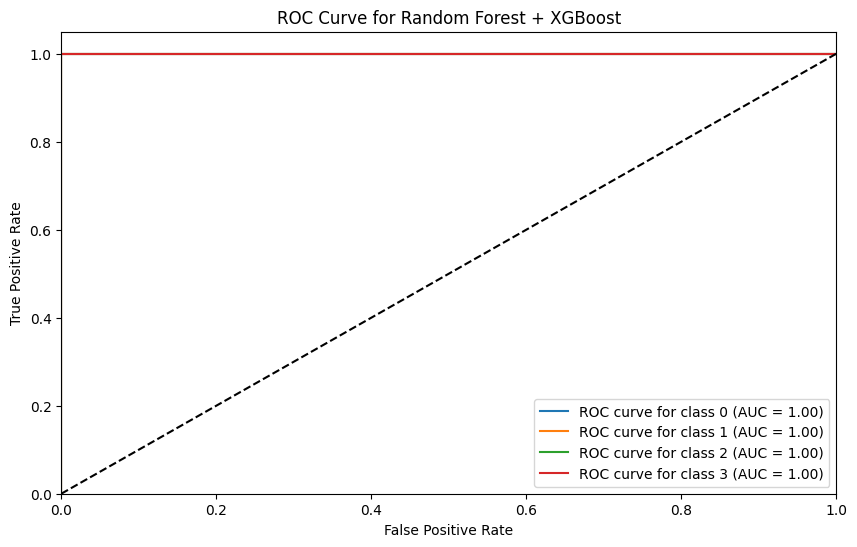

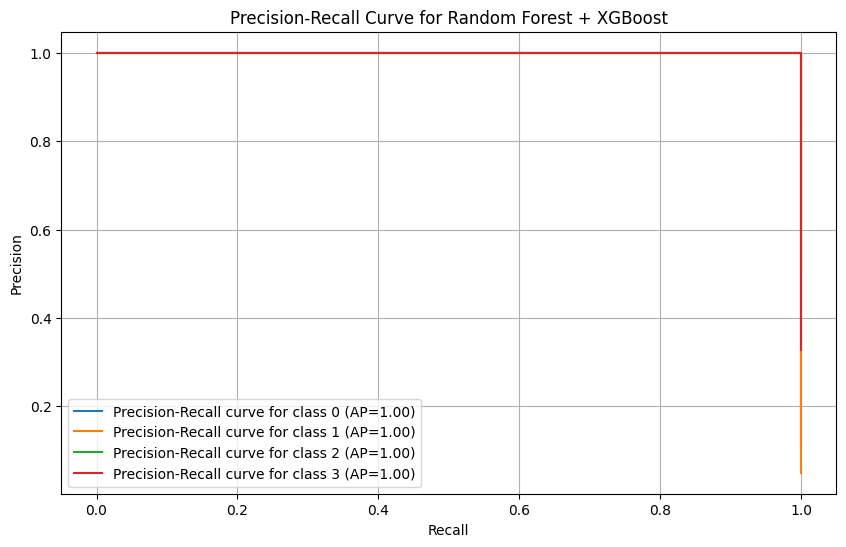

In [60]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

# Voting Classifier with Random Forest and XGBoost
xgb_clf = xgb.XGBClassifier()
voting_clf = VotingClassifier(
    estimators=[('rf', RandomForestClassifier()), ('xgb', xgb_clf)],
    voting='soft'
)

evaluate_model(voting_clf, 'Random Forest + XGBoost')



# **Comparision of Boosters:**

| Algorithm                                | Accuracy | Precision | Recall | F1-Score | Loss | Cohen Kappa Score | Matthews Corr. Coeff. | Hamming Loss | Weighted Jaccard |
|------------------------------------------|----------|-----------------|--------------|----------------|----------|-------------------|-----------------------|--------------|------------------|
| **AdaBoost + Random Forest**     | 0.9502   | 0.9156          | 0.9502       | 0.9298         | 0.1031   | 0.9192           | 0.9230               | 0.0498       | 0.9156           |
| **Gradient Boosting + Random Forest** | 0.9851   | 0.9853          | 0.9851       | 0.9851         | 0.0544   | 0.9759           | 0.9760               | 0.0149       | 0.9706           |
| **Random Forest + XGBoost** | 0.9950   | 0.9955          | 0.9950       | 0.9951         | 0.0659   | 0.9920           | 0.9920               | 0.0050       | 0.9905           |


## Performance-wise order of the Boosters
### 1. XGBoost
### 2. Gradient Boosting
### 3. AdaBoost